In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load dataset
df = pd.read_csv("/content/clean_agripreneur.csv")

In [ ]:
#Filtering to young farmers (Age 18–35)
young_df = df[df['Age'].between(18, 35)].copy()

In [ ]:
# Categorizing repayment score
def categorize_score(prob):
    if prob >= 75:
        return 'High'
    elif prob >= 50:
        return 'Medium'
    else:
        return 'Low'

young_df['Score_Category'] = young_df['Repayment_Probability'].apply(categorize_score)

In [ ]:
#Selecting and preparing features
features = ['Savings_Behavior', 'Technology_Use', 'Extension_Services',
            'Education', 'Financial_Access', 'Previous_Loans']

In [ ]:
if young_df['Education'].dtype == 'object':
    encoder = LabelEncoder()
    young_df['Education'] = encoder.fit_transform(young_df['Education'])

X = young_df[features]
y = young_df['Score_Category']

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
 #Random Forest model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluation
y_pred = model.predict(X_test)
labels = ['High', 'Medium', 'Low']
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, labels=labels))
print("\nClassification Report:\n", classification_report(y_test, y_pred, labels=labels, zero_division=0))

Confusion Matrix:
 [[82  9  6]
 [29 27 10]
 [16 17  4]]

Classification Report:
               precision    recall  f1-score   support

        High       0.65      0.85      0.73        97
      Medium       0.51      0.41      0.45        66
         Low       0.20      0.11      0.14        37

    accuracy                           0.56       200
   macro avg       0.45      0.45      0.44       200
weighted avg       0.52      0.56      0.53       200



In [ ]:
# scores for all young farmers
young_df['Predicted_Score'] = model.predict(X)
print("\nSample Farmer Scores:")
print(young_df[['Age'] + features + ['Predicted_Score']].head())


Sample Farmer Scores:
   Age  Savings_Behavior  Technology_Use  Extension_Services  Education  \
0   32                 1               1                   0          1   
1   32                 0               1                   1          1   
2   31                 0               0                   0          0   
3   26                 0               0                   1          0   
4   29                 0               1                   1          2   

   Financial_Access  Previous_Loans Predicted_Score  
0                 0               0            High  
1                 1               0          Medium  
2                 1               0             Low  
3                 1               0             Low  
4                 1               1             Low  


In [ ]:
# Calculate the percentage distribution of predicted scores
predicted_score_distribution = young_df['Predicted_Score'].value_counts(normalize=True) * 100

# Print the distribution
print("\nPercentage Distribution of Predicted Scores:")
print(predicted_score_distribution)


Percentage Distribution of Predicted Scores:
Predicted_Score
High      57.3
Medium    32.2
Low       10.5
Name: proportion, dtype: float64


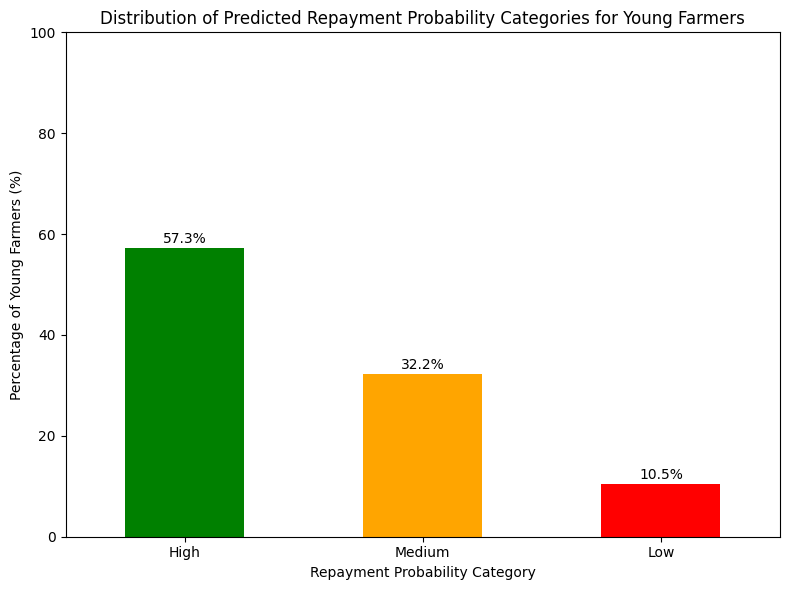

In [ ]:


import matplotlib.pyplot as plt
# Sort the distribution in the desired order (High, Medium, Low)
ordered_distribution = predicted_score_distribution.reindex(['High', 'Medium', 'Low'])
# Create the bar chart
plt.figure(figsize=(8, 6))
ordered_distribution.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribution of Predicted Repayment Probability Categories for Young Farmers')
plt.xlabel('Repayment Probability Category')
plt.ylabel('Percentage of Young Farmers (%)')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.ylim(0, 100) # Ensure the y-axis goes up to 100%
# Add percentage labels on top of the bars
for index, value in enumerate(ordered_distribution):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:

#  farmers predicted to have Low repayment probability
low_repayment_df = young_df[young_df['Predicted_Score'] == 'Low']
#  number of young farmers predicted to have Low repayment probability
print(f"\nNumber of young farmers predicted with Low repayment probability: {len(low_repayment_df)}")
# the characteristics of the 'Low' repayment group
print("\nCharacteristics of Young Farmers with Predicted Low Repayment Probability:")
# Display descriptive statistics for numerical features
print("\nDescriptive Statistics:")
print(low_repayment_df[['Savings_Behavior', 'Technology_Use', 'Financial_Access']].describe())
# the distribution of categorical features
print("\nDistribution of Categorical Features:")
for feature in ['Extension_Services', 'Education', 'Previous_Loans']:
    if feature == 'Education':
        # Inverse transform the encoded Education values back to original categories
        print(f"\n{feature} Distribution:")
        print(low_repayment_df['Education'].value_counts(normalize=True) * 100)
    else:
        print(f"\n{feature} Distribution:")
        print(low_repayment_df[feature].value_counts(normalize=True) * 100)
# the distribution of Previous_Loans within the Low repayment group
print("\nDistribution of Previous_Loans for Low Repayment Group:")
print(low_repayment_df['Previous_Loans'].value_counts(normalize=True) * 100)

# Feature Importance from the trained model for insights into drivers
print("\nFeature Importances from the Random Forest Model:")
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
feature_importances



Number of young farmers predicted with Low repayment probability: 105

Characteristics of Young Farmers with Predicted Low Repayment Probability:

Descriptive Statistics:
       Savings_Behavior  Technology_Use  Financial_Access
count        105.000000      105.000000        105.000000
mean           0.114286        0.447619          0.419048
std            0.319684        0.499634          0.495770
min            0.000000        0.000000          0.000000
25%            0.000000        0.000000          0.000000
50%            0.000000        0.000000          0.000000
75%            0.000000        1.000000          1.000000
max            1.000000        1.000000          1.000000

Distribution of Categorical Features:

Extension_Services Distribution:
Extension_Services
1    54.285714
0    45.714286
Name: proportion, dtype: float64

Education Distribution:
Education
0    50.476190
1    28.571429
2    20.952381
Name: proportion, dtype: float64

Previous_Loans Distribution:
Previous

,0
Savings_Behavior,0.446644
Education,0.176591
Extension_Services,0.103769
Technology_Use,0.103058
Financial_Access,0.091005
Previous_Loans,0.078932



Analysis of Annual Income and Savings Behavior by Predicted Score Category:
                 Annual_Income                                   \
                          mean      median            std count   
Predicted_Score                                                   
High             299824.388778  296274.350  103118.152228   573   
Low              291044.220190  296499.240   97455.579748   105   
Medium           297904.299783  295409.235   94587.341255   322   

                Savings_Behavior                         
                            mean median       std count  
Predicted_Score                                          
High                    0.982548    1.0  0.131063   573  
Low                     0.114286    0.0  0.319684   105  
Medium                  0.093168    0.0  0.291120   322  


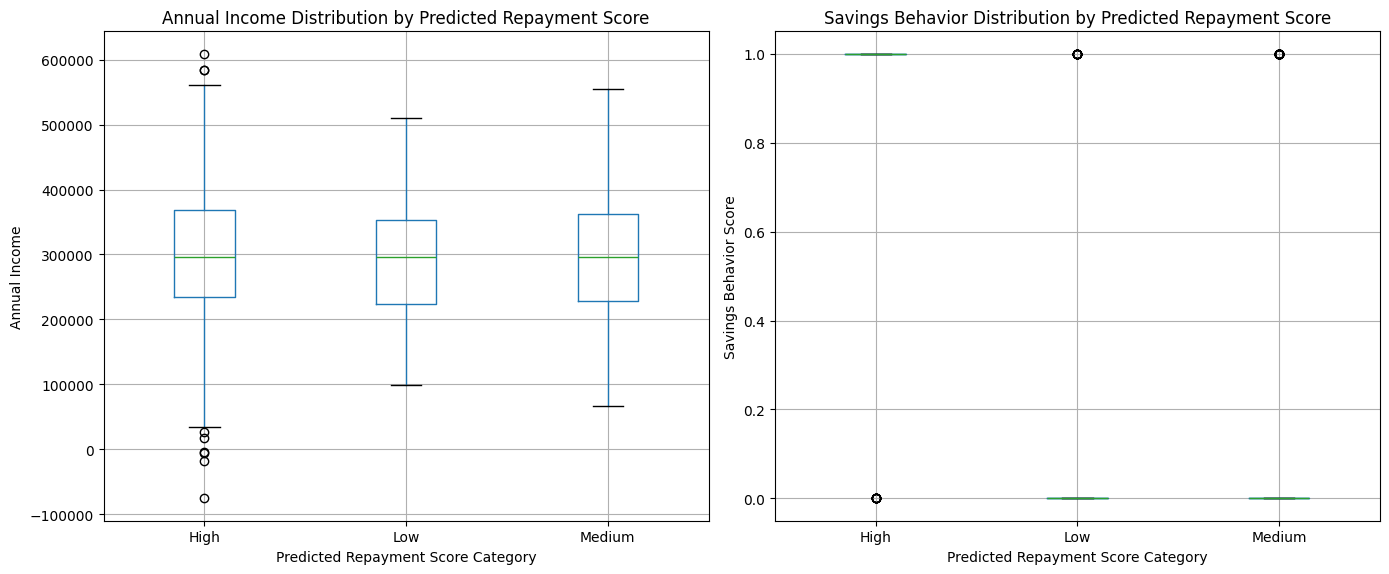

In [ ]:


# Analyze the impact of Annual Income and Savings Behavior on Score Category
print("\nAnalysis of Annual Income and Savings Behavior by Predicted Score Category:")

# Group by Predicted_Score and calculate descriptive statistics for Annual_Income and Savings_Behavior
income_savings_by_score = young_df.groupby('Predicted_Score')[['Annual_Income', 'Savings_Behavior']].agg(['mean', 'median', 'std', 'count'])

# Print the grouped statistics
print(income_savings_by_score)

# You can also visualize this data
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Annual Income by Predicted Score Category
young_df.boxplot(column='Annual_Income', by='Predicted_Score', ax=axes[0])
axes[0].set_title('Annual Income Distribution by Predicted Repayment Score')
axes[0].set_xlabel('Predicted Repayment Score Category')
axes[0].set_ylabel('Annual Income')
axes[0].get_figure().suptitle('') # Remove default title

# Box plot for Savings Behavior by Predicted Score Category
young_df.boxplot(column='Savings_Behavior', by='Predicted_Score', ax=axes[1])
axes[1].set_title('Savings Behavior Distribution by Predicted Repayment Score')
axes[1].set_xlabel('Predicted Repayment Score Category')
axes[1].set_ylabel('Savings Behavior Score')
axes[1].get_figure().suptitle('') # Remove default title

plt.tight_layout()
plt.show()




In [ ]:


# Check for negative values in 'Annual_Income' for each 'Predicted_Score' category
print("\nChecking for negative 'Annual_Income' values by 'Predicted_Score':")

for score_category in young_df['Predicted_Score'].unique():
    subset_df = young_df[young_df['Predicted_Score'] == score_category]
    negative_income_count = subset_df[subset_df['Annual_Income'] < 0].shape[0]
    print(f"  Category '{score_category}': {negative_income_count} negative 'Annual_Income' values")




Checking for negative 'Annual_Income' values by 'Predicted_Score':
  Category 'High': 4 negative 'Annual_Income' values
  Category 'Medium': 0 negative 'Annual_Income' values
  Category 'Low': 0 negative 'Annual_Income' values


In [ ]:
# using K-Means clustering on the 'Low' repayment group (you'll need to scale the data first)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering (consider only numerical features or appropriate encoding)
low_repayment_features = low_repayment_df[['Age', 'Savings_Behavior', 'Technology_Use', 'Financial_Access', 'Annual_Income']].copy()

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(low_repayment_features)

# Apply KMeans (choose the number of clusters based on domain knowledge or evaluation metrics)
kmeans = KMeans(n_clusters=3, random_state=42)
low_repayment_df['Low_Risk_Subgroup'] = kmeans.fit_predict(scaled_features)

# Analyze the characteristics of the subgroups
print("\nAnalysis of Low Risk Subgroups:")
print(low_repayment_df.groupby('Low_Risk_Subgroup')[['Age', 'Savings_Behavior', 'Technology_Use', 'Financial_Access', 'Annual_Income']].describe())


Analysis of Low Risk Subgroups:
                    Age                                                      \
                  count       mean       std   min   25%   50%    75%   max   
Low_Risk_Subgroup                                                             
0                  31.0  27.000000  5.697953  18.0  23.0  28.0  31.00  35.0   
1                  44.0  26.818182  5.375538  18.0  22.0  28.0  31.25  35.0   
2                  30.0  25.800000  4.566746  19.0  22.5  25.0  27.75  35.0   

                  Savings_Behavior            ... Financial_Access       \
                             count      mean  ...              75%  max   
Low_Risk_Subgroup                             ...                         
0                             31.0  0.000000  ...              0.0  0.0   
1                             44.0  0.068182  ...              1.0  1.0   
2                             30.0  0.300000  ...              0.0  0.0   

                  Annual_Income          

<ipython-input-49-f6b01eeab38f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_repayment_df['Low_Risk_Subgroup'] = kmeans.fit_predict(scaled_features)


In [ ]:
print("\nCrosstabulations within Predicted Score Categories:")
categorical_features = ['Extension_Services', 'Education', 'Previous_Loans']

for score_category in young_df['Predicted_Score'].unique():
    print(f"\nAnalysis for Predicted Score Category: {score_category}")
    subset_df = young_df[young_df['Predicted_Score'] == score_category]

    for i in range(len(categorical_features)):
        for j in range(i + 1, len(categorical_features)):
            feature1 = categorical_features[i]
            feature2 = categorical_features[j]
            print(f"\nCrosstab of {feature1} and {feature2}:")
            print(pd.crosstab(subset_df[feature1], subset_df[feature2], normalize='index'))


Crosstabulations within Predicted Score Categories:

Analysis for Predicted Score Category: High

Crosstab of Extension_Services and Education:
Education                  0         1         2
Extension_Services                              
0                   0.267857  0.510714  0.221429
1                   0.279863  0.511945  0.208191

Crosstab of Extension_Services and Previous_Loans:
Previous_Loans             0         1
Extension_Services                    
0                   0.603571  0.396429
1                   0.641638  0.358362

Crosstab of Education and Previous_Loans:
Previous_Loans         0         1
Education                         
0               0.598726  0.401274
1               0.600683  0.399317
2               0.707317  0.292683

Analysis for Predicted Score Category: Medium

Crosstab of Extension_Services and Education:
Education                  0         1         2
Extension_Services                              
0                   0.189944  0.558659  0


Relationship between Financial Access and Loan Repayment (Predicted Score):
Financial_Access         0         1
Predicted_Score                     
High              0.251309  0.748691
Low               0.580952  0.419048
Medium            0.307453  0.692547


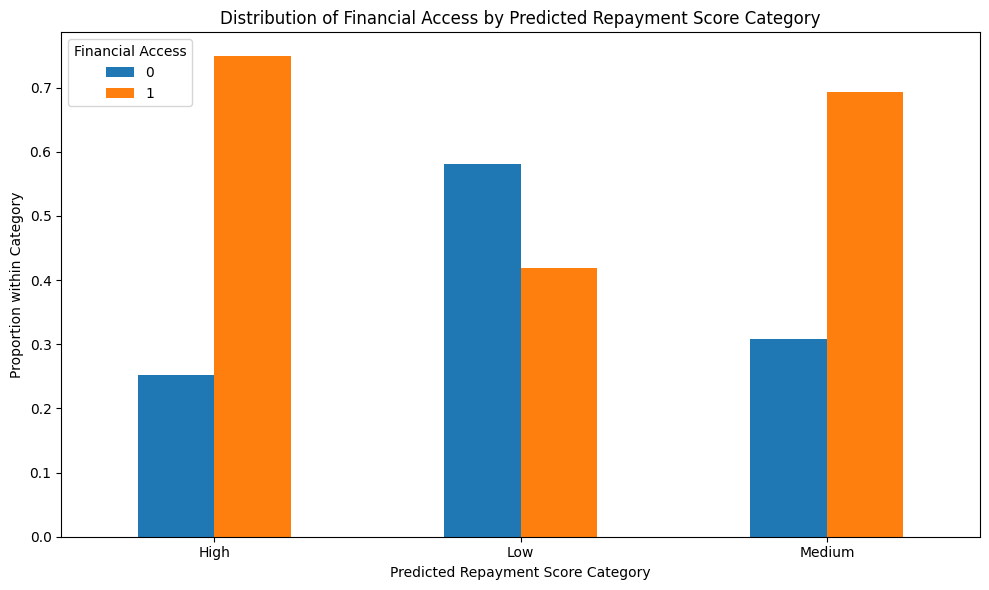


Average Financial Access Score by Predicted Repayment Score:
Predicted_Score
High      0.748691
Low       0.419048
Medium    0.692547
Name: Financial_Access, dtype: float64

Financial Access Distribution within the Predicted Low Repayment Group:
Financial_Access
0    58.095238
1    41.904762
Name: proportion, dtype: float64


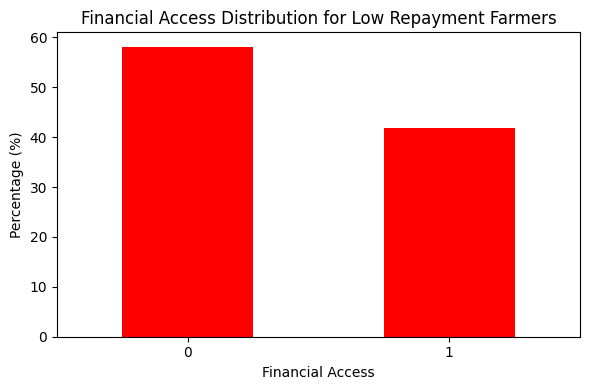

In [ ]:

print("\nRelationship between Financial Access and Loan Repayment (Predicted Score):")

# Analyze the distribution of Financial_Access within each Predicted_Score category
financial_access_by_score = young_df.groupby('Predicted_Score')['Financial_Access'].value_counts(normalize=True).unstack()

print(financial_access_by_score)

# Visualize the relationship using a bar plot
financial_access_by_score.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Financial Access by Predicted Repayment Score Category')
plt.xlabel('Predicted Repayment Score Category')
plt.ylabel('Proportion within Category')
plt.xticks(rotation=0)
plt.legend(title='Financial Access')
plt.tight_layout()
plt.show()

# Further examine the average Financial_Access score for each Predicted_Score category (if Financial_Access is numerical)
if young_df['Financial_Access'].dtype != 'object':
    print("\nAverage Financial Access Score by Predicted Repayment Score:")
    print(young_df.groupby('Predicted_Score')['Financial_Access'].mean())

# You can also look at the relationship within the 'Low' repayment group specifically
print("\nFinancial Access Distribution within the Predicted Low Repayment Group:")
low_repayment_financial_access = low_repayment_df['Financial_Access'].value_counts(normalize=True) * 100
print(low_repayment_financial_access)

# Visualize the financial access distribution for the Low repayment group
plt.figure(figsize=(6, 4))
low_repayment_financial_access.plot(kind='bar', color='red')
plt.title('Financial Access Distribution for Low Repayment Farmers')
plt.xlabel('Financial Access')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Financial Access Distribution for Farmers with Negative Annual Income:
Financial_Access
1    75.0
0    25.0
Name: proportion, dtype: float64


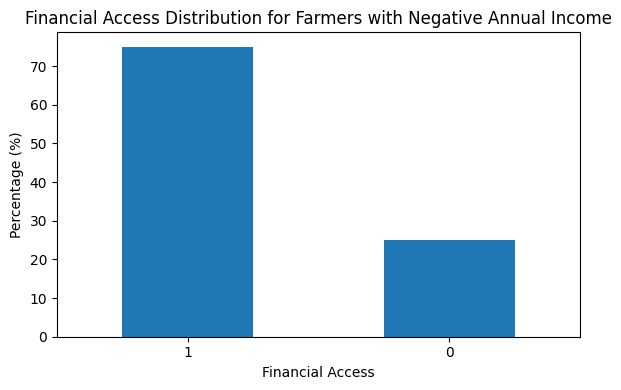


Predicted Repayment Score Distribution for Farmers with Negative Annual Income:
Predicted_Score
High    100.0
Name: proportion, dtype: float64


In [ ]:
# prompt: those farmers that have negative annual income, i want to know if they have financial acces

# Filter for farmers with negative annual income
negative_income_df = young_df[young_df['Annual_Income'] < 0].copy()

# Check the distribution of 'Financial_Access' for these farmers
print("\nFinancial Access Distribution for Farmers with Negative Annual Income:")
if not negative_income_df.empty:
    financial_access_distribution = negative_income_df['Financial_Access'].value_counts(normalize=True) * 100
    print(financial_access_distribution)

    # Optionally, visualize this distribution
    plt.figure(figsize=(6, 4))
    financial_access_distribution.plot(kind='bar')
    plt.title('Financial Access Distribution for Farmers with Negative Annual Income')
    plt.xlabel('Financial Access')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("No farmers found with negative annual income.")

# You can also see how many of these farmers fall into each predicted score category
print("\nPredicted Repayment Score Distribution for Farmers with Negative Annual Income:")
if not negative_income_df.empty:
    predicted_score_distribution = negative_income_df['Predicted_Score'].value_counts(normalize=True) * 100
    print(predicted_score_distribution)
else:
    print("No farmers found with negative annual income.")

In [ ]:
print("\nNumber of negative Annual Income values:", (young_df['Annual_Income'] < 0).sum())
print("\nSample negative Annual Income values:\n", young_df[young_df['Annual_Income'] < 0]['Annual_Income'])


Number of negative Annual Income values: 4

Sample negative Annual Income values:
 200   -18781.15
269    -4592.88
490    -5601.22
721   -75743.53
Name: Annual_Income, dtype: float64



Feature Importances:
Savings_Behavior      0.446644
Education             0.176591
Extension_Services    0.103769
Technology_Use        0.103058
Financial_Access      0.091005
Previous_Loans        0.078932
dtype: float64


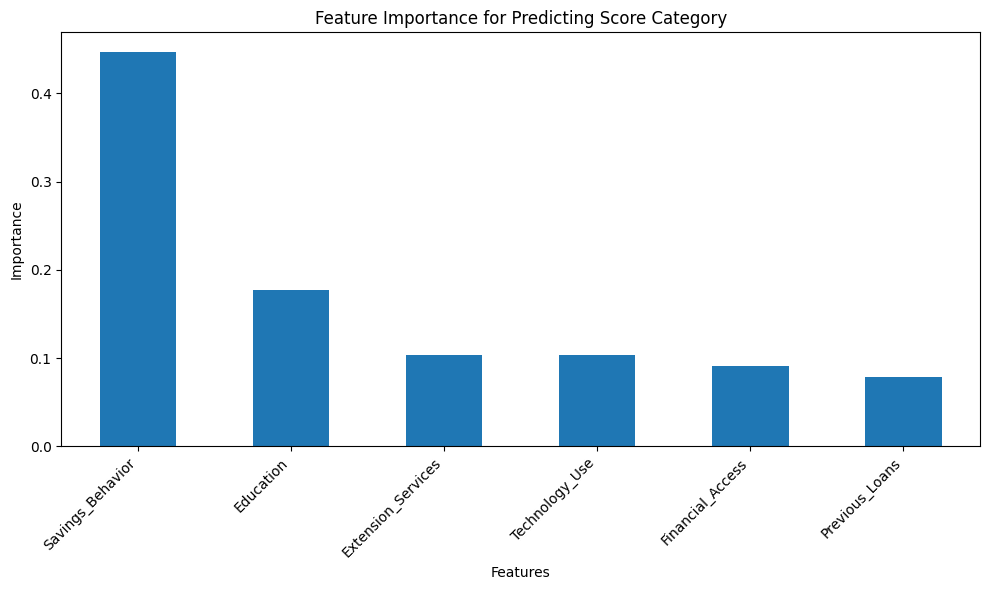

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a pandas Series for easier visualization
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort the features by importance
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Print or plot feature importance
print("\nFeature Importances:")
print(sorted_feature_importance)

# Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sorted_feature_importance.plot(kind='bar')
plt.title('Feature Importance for Predicting Score Category')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

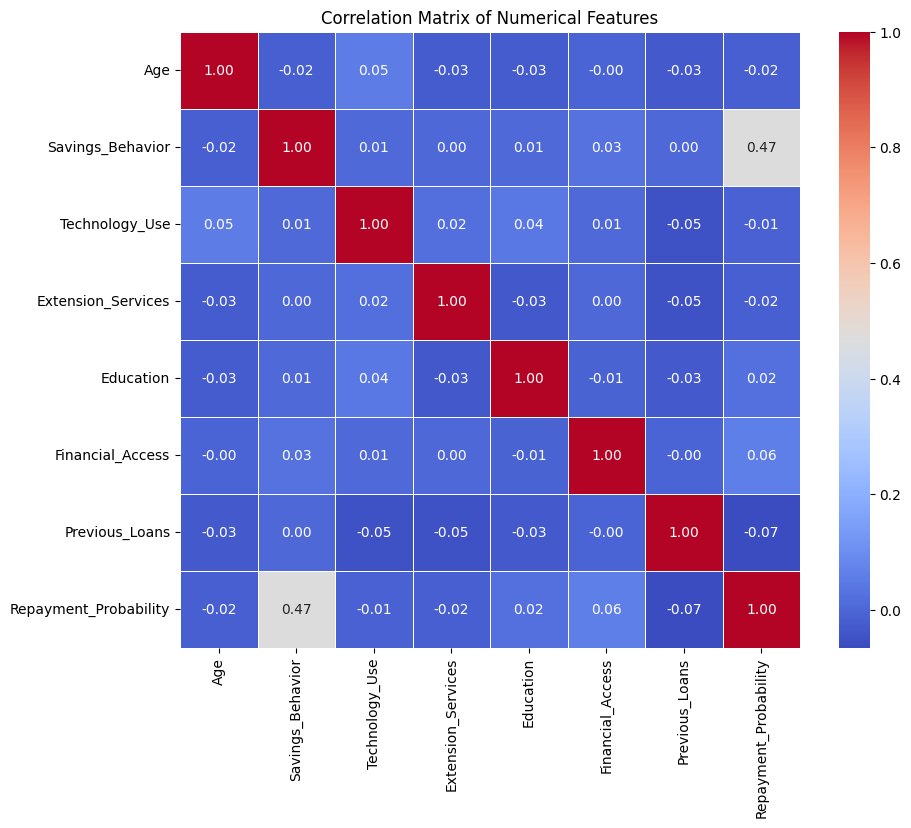

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
# You might need to adjust this based on your actual numerical columns
numerical_df = young_df[['Age', 'Savings_Behavior', 'Technology_Use',
                        'Extension_Services', 'Education', 'Financial_Access',
                        'Previous_Loans', 'Repayment_Probability']].copy()

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
print(feature_importances)

[0. 0. 0. 0. 0. 0.]
